In [5]:
import cv2
import pylab as plt
import dask
from tifffile import imread
import numpy as np
from mptracker import MPTracker
from ipywidgets import *
from IPython.display import display
import pylab as plt
# Load data
data = imread('/Users/joao/data/eyecam/20171009_run000_00000000.tif')
data = imread('/Users/joao/Downloads/test4.tif')
# Load parameters
import json
with open('/Users/joao/lib/mptracker/notebooks/test1.json','r') as f:
    params = json.load(f)
# Init tracker
tracker = MPTracker(params)
tracker.setROI(params['points'])

<IPython.core.display.Javascript object>


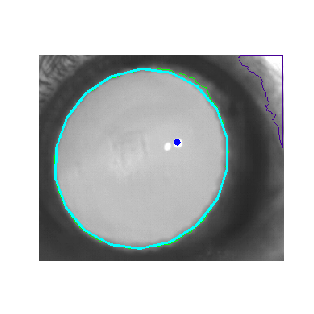

IntSlider(value=210, description=u'Frame', max=1742)

In [18]:
def nbPlayTracking(data,tracker):
    dd = data[210]
    tdat = tracker.apply(dd)
    im = plt.imshow(tdat[0])
    slider = widgets.IntSlider(210,
                               min = 0,
                               max = len(data)-1,
                               step = 1,
                               description='Frame')
    display(slider)
    def updateImage(change):
        dd = data[change['new']]
        tdat = tracker.apply(dd)
        im.set_data(tdat[0])
    slider.observe(updateImage, names='value')
%matplotlib notebook
fig = plt.figure(figsize=[3.5,3.5])
nbPlayTracking(data,tracker)
plt.axis('off');
